# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #для визуализации
# откройте данные: ваш код здесь
mail_data = pd.read_csv('data/spam_or_not_spam.csv')
display(mail_data.head())


,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [69]:
# рассчитайте частоты для классов : ваш код здесь
mail_data['label'].value_counts()

label
0    2500
1     500
Name: count, dtype: int64

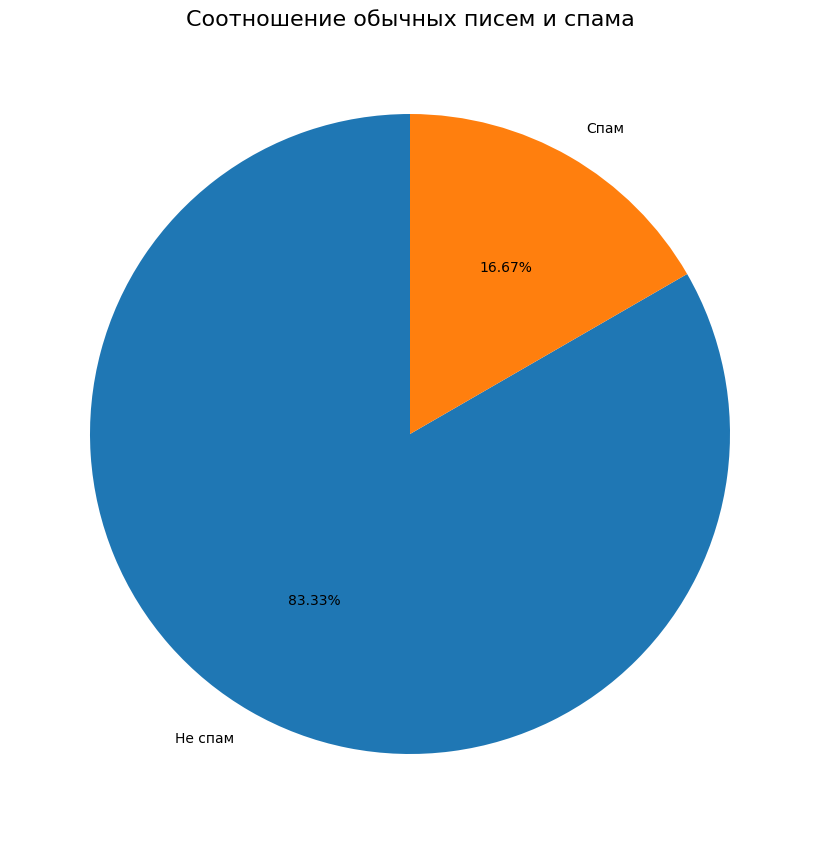

In [70]:
# визуализируйте результат: ваш код здесь
labels = ['Не спам','Спам'] # категории
fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes((1, 1, 1, 1))
data = mail_data['label'].value_counts()
pie = ax.pie(
    data,
    labels=labels,
    autopct='%1.2f%%',
    startangle=90
)
title = ax.set_title('Соотношение обычных писем и спама', fontsize=16)
plt.show(pie)

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [72]:
#ваш код здесь
mail_data['email'] = mail_data['email'].str.replace('\s+', ' ', regex=True).str.strip()
mail_data['email'] = mail_data['email'].replace(r'^\s*$', np.nan, regex=True)
mail_data['email'] = mail_data['email'].str.lower()

mail_data.dropna(subset=['email', 'label'], inplace=True)
display(mail_data.info())
display(mail_data['email'].head())

<class 'pandas.core.frame.DataFrame'>
Index: 2997 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2997 non-null   object
 1   label   2997 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 70.2+ KB


None

0    date wed number aug number number number numbe...
1    martin a posted tassos papadopoulos the greek ...
2    man threatens explosion in moscow thursday aug...
3    klez the virus that won t die already the most...
4    in adding cream to spaghetti carbonara which h...
Name: email, dtype: object

Переводим данные в векторный вид:

In [73]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(mail_data["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [74]:
#ваш код здесь
print(X.shape)

(2997, 34116)


## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [75]:
#ваш код здесь
y = mail_data['label']

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [76]:
#ваш код здесь
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [77]:
#ваш код здесь
display(round(y_test.mean(),3))

0.165

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [78]:
#ваш код здесь
from sklearn.naive_bayes import ComplementNB
clf = ComplementNB(alpha = 0.01)
clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [79]:
#ваш код здесь
from sklearn import metrics
print('Accuracy: {:.3f}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Precision: {:.3f}'.format(metrics.precision_score(y_test, y_test_pred)))
print('Recall: {:.3f}'.format(metrics.recall_score(y_test, y_test_pred)))
print('F1-score: {:.3f}'.format(metrics.f1_score(y_test, y_test_pred)))


Accuracy: 0.988
Precision: 1.000
Recall: 0.927
F1-score: 0.962


Нарисуйте ROC-кривую:

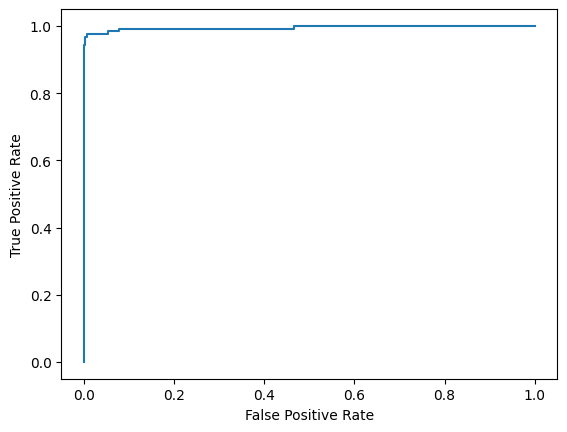

In [80]:
#ваш код здесь
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

#create ROC curve
plt.plot (fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [83]:
#ваш код здесь
from sklearn import model_selection

alpha_list = [0.01, 0.05, 0.1, 0.2, 0.5, 1]
for alpha in alpha_list:
    clf = ComplementNB(alpha = alpha)
    kf = model_selection.StratifiedKFold(n_splits=5)
    cv_metrics = model_selection.cross_validate(
        estimator=clf, #модель
        X=X, #матрица наблюдений X
        y=y, #вектор ответов y
        cv=kf, #кросс-валидатор
        scoring='recall', #метрика
        return_train_score=True #подсчёт метрики на тренировочных фолдах
    )
    #display(cv_metrics)
    print('\N{greek small letter alpha} = {:.3f}'.format(alpha))
    print('Train k-fold mean Recall: {:.3f}'.format(np.mean(cv_metrics['train_score'])))
    print('Train k-fold mean Recall: {:.3f}'.format(np.mean(cv_metrics['test_score'])))

α = 0.010
Train k-fold mean Recall: 0.995
Train k-fold mean Recall: 0.933
α = 0.050
Train k-fold mean Recall: 0.993
Train k-fold mean Recall: 0.956
α = 0.100
Train k-fold mean Recall: 0.993
Train k-fold mean Recall: 0.970
α = 0.200
Train k-fold mean Recall: 0.993
Train k-fold mean Recall: 0.970
α = 0.500
Train k-fold mean Recall: 0.991
Train k-fold mean Recall: 0.970
α = 1.000
Train k-fold mean Recall: 0.990
Train k-fold mean Recall: 0.952


На основании полученных данных можно сделать вывод о том, что качество классификации зависит от параметра $\alpha$, хотя и не очень сильно. Кроме того, эта зависимость видна не для всех метрик. Например, для Accuracy влияние параметра $\alpha$ будет минимальным, а для Recall наиболее заметным.